# Task 1 – Student Score Prediction

Objective:
Predict students' exam scores based on study hours (and possibly other factors) using regression.  
We will:
1. Load and explore the dataset
2. Clean and preprocess data
3. Train a Linear Regression model
4. Evaluate performance with metrics and plots
5. (Bonus) Try Polynomial Regression and compare


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score


In [15]:
df = pd.read_csv("StudentPerformanceFactors.csv")

# Basic info
print("Shape:", df.shape)
df.head()


Shape: (6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

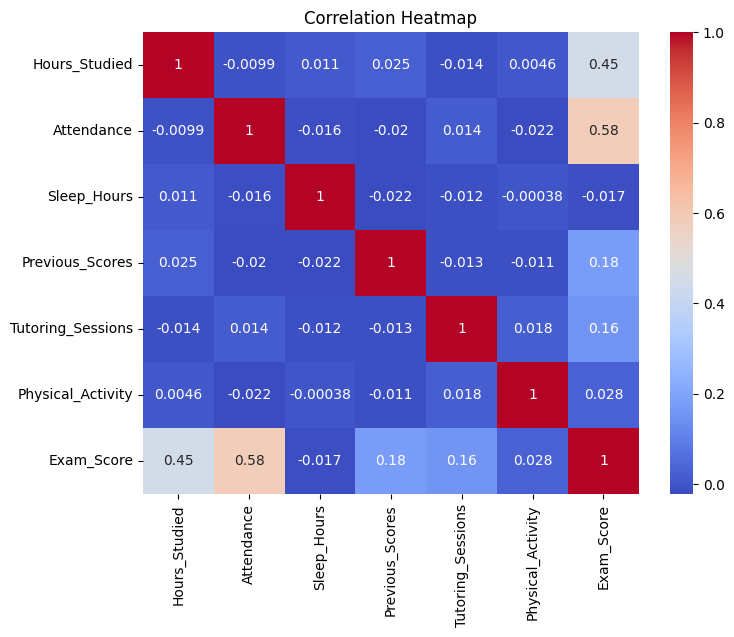

In [16]:
# Check for missing values
df.info()
df.isnull().sum()

# Quick statistics
df.describe()

# Simple visualization - correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



In [17]:
target_col = "Exam_Score"   # <-- adjust if your dataset uses another name
features = [col for col in df.columns if col != target_col]

X = df[features]
y = df[target_col]

print("Features:", features)
print("Target:", target_col)


Features: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Target: Exam_Score


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (5285, 19)
Test size: (1322, 19)


In [19]:
# Separate numeric & categorical columns
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric features:", numeric_cols)
print("Categorical features:", categorical_cols)

# Pipelines
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", num_pipe, numeric_cols),
    ("cat", cat_pipe, categorical_cols)
])


Numeric features: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
Categorical features: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


In [20]:
linreg = Pipeline([
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)


In [21]:
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Linear Regression Results ===")
print(f"MAE : {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²  : {r2:.3f}")


=== Linear Regression Results ===
MAE : 0.452
RMSE: 1.804
R²  : 0.770


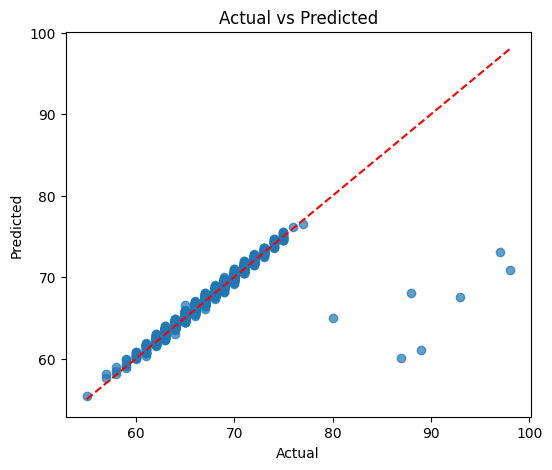

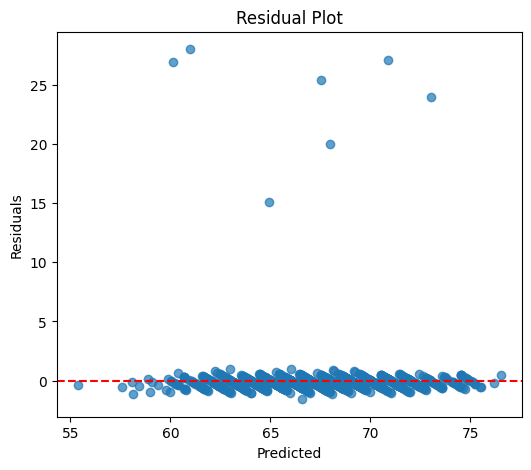

In [23]:
# Actual vs Predicted
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(6,5))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()



=== Polynomial Regression (degree=2) ===
MAE : 2.4447795821288105
RMSE: 3.2931729586684346
R²  : 0.23276034442853466


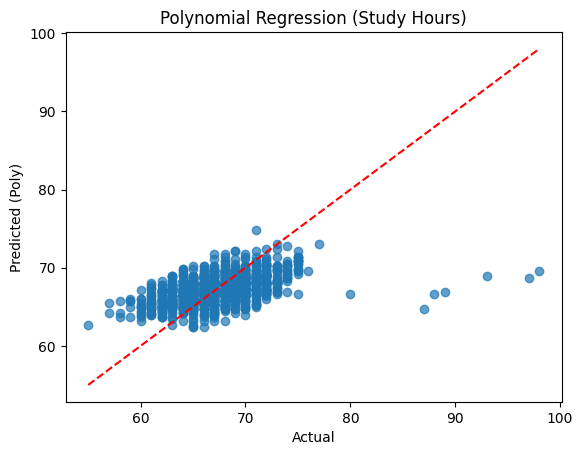

In [25]:
if "Hours_Studied" in X.columns:
    poly_model = make_pipeline(
        SimpleImputer(strategy="median"),
        PolynomialFeatures(degree=2, include_bias=False),
        StandardScaler(),
        LinearRegression()
    )

    poly_model.fit(X_train[["Hours_Studied"]], y_train)
    y_poly_pred = poly_model.predict(X_test[["Hours_Studied"]])

    print("=== Polynomial Regression (degree=2) ===")
    print("MAE :", mean_absolute_error(y_test, y_poly_pred))
    print("RMSE:", root_mean_squared_error(y_test, y_poly_pred))
    print("R²  :", r2_score(y_test, y_poly_pred))

    # Plot
    plt.scatter(y_test, y_poly_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted (Poly)")
    plt.title("Polynomial Regression (Study Hours)")
    plt.show()
else:
    print("No Study_Hours column available, skipping polynomial regression.")
